In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rcParams
import celerite
from celerite import terms
from celerite.modeling import Model
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from astropy.table import Table

rcParams['figure.figsize'] = (16.0, 8.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')

In [3]:
cf = fitting.CarbonFitter(cbm)
cf.load_data('miyake12.csv')
cf.prepare_function()

No matching production function, use default miyake production with fixed solar cycle (11 yrs) and amplitude (0.18)



In [4]:
%%time
default_params = [775., 1./12, np.pi/2., 81./12]
sampler = cf.sampling(default_params, burnin=1000, production=2000)

Running burn-in...


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.77it/s]


Running production...


100%|███████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:04<00:00, 10.82it/s]

CPU times: user 4min 45s, sys: 4.33 s, total: 4min 49s
Wall time: 4min 39s


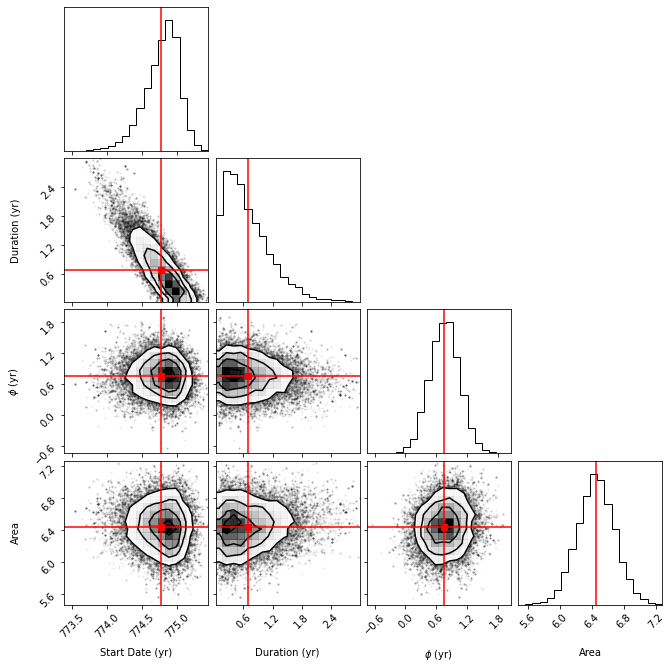

In [5]:
cf.corner_plot(sampler, labels=[r"Start Date (yr)", r"Duration (yr)", r"$\phi$ (yr)", r"Area"])

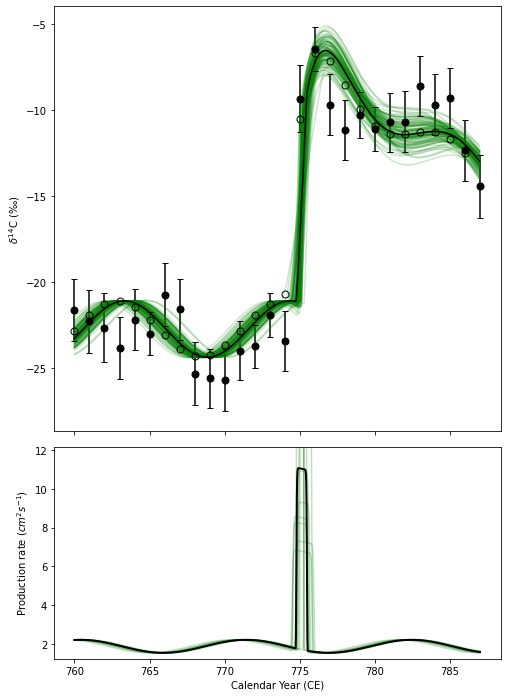

In [6]:
cf.plot_samples(sampler)